In [17]:
import pandas as pd
import os
import shutil
from tqdm import tqdm
import umap
import plotly.express as px
import glob
import torch
import torchaudio
import numpy as np
MODEL_FILE = r'C:\Users\amitli\Repo\SpeakerVerification2024\Models\ecapa2\ecapa2.pt'
SRC_PATH   = r'C:\Users\amitli\Repo\SpeakerVerification2024\Dataset_SR16000'

<h2> Ecapa2 embeddings: </h2>

In [9]:
df_dataset = pd.read_csv(rf'{SRC_PATH}\speakers.csv')

In [10]:
ecapa2    = torch.jit.load(MODEL_FILE, map_location='cuda')

In [13]:
l_ecapa2_emb = []
for file_name in tqdm(df_dataset.file_name.values):
    audio, sr = torchaudio.load(rf'{SRC_PATH}\{file_name}') 
    embedding = ecapa2(audio.to('cuda'))
    embedding = embedding.cpu().reshape(-1).numpy()
    l_ecapa2_emb.append(embedding)

df_dataset['ecapa2'] = l_ecapa2_emb
df_dataset.to_pickle('ecapa2.pkl')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.84it/s]


In [14]:
df_dataset = pd.read_pickle('ecapa2.pkl')

In [19]:
emb_arr = np.vstack(df_dataset.ecapa2.values)
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap  = reducer.fit_transform(np.vstack(df_dataset.ecapa2.values))

c:\Users\amitli\Repo\py310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\amitli\Repo\py310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


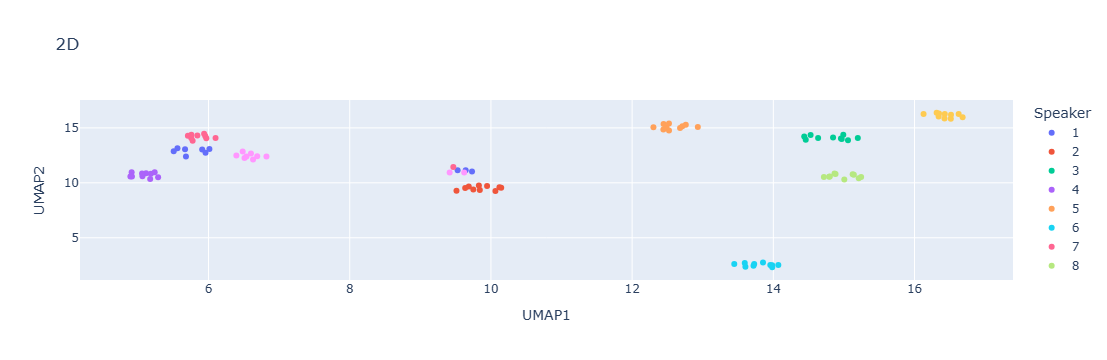

In [29]:
l_str_speaker =  np.repeat(np.arange(1, 11), 10)
umap_df = {
    "UMAP1"  : X_umap[:, 0],
    "UMAP2"  : X_umap[:, 1],
    "Speaker": l_str_speaker.astype(str)
    #"Speaker": df_dataset.speaker.values
}

fig = px.scatter(
    umap_df,
    x     = "UMAP1",
    y     = "UMAP2",
    color = "Speaker",
    title = "2D",    
)

fig.show()